# Game of Fivers

_Combinatorial Optimization course, FEE CTU in Prague. Created by [Industrial Informatics Department](http://industrialinformatics.fel.cvut.cz)._

## Motivation

Riddle: On a square board of size $(n \times n)$ there lie $n^2$ stones. Every stone has two sides - white and black. In the beginning, all stones have the white side facing upwards.

You may turn the stone (white to black or black to white), but if you do that, all the stones in its 4-neighborhood will be turned as well. You want to reach the state in which all the stones have their black sides facing upwards. 

What is the minimal number of moves you need to do? 

## Input

You are given a positive integer $n \geq 3$, representing the size of the board.


In [1]:
n = 5

## Output

You should find a minimal number of moves that need to be done to reach the final states (all stones black). Also, you should provide the moves (e.g., a list of positions of the stones to be turned over).

## Model

If we want to model the problem, we need to use several properties of the problem:

**1) Order of the moves is not important (show them several moves).**

<img src="./image_1.png" alt="Order is not important" width="200px"/>

**2) Each stone is selected at most once.**
    
Imagine a sequence of moves:
    
$$
\dots (3,2) \dots (3,2) \dots (3,2) \dots
$$
    
Because the order is not important, we can write
  
$$
\dots (3,2), (3,2), (3,2) \dots
$$
   
It is easy to see, that even number of moves (with a same piece) will cancel the effect.

**3) Color of the top side of the stone depends on the 4-neighbourhood (and the stone itself).**

<img src="./image_2.png" alt="Color depends on 4-neighborhood" width="400"/>


### ILP model:

We define variables $x_{i,j}$ with the following meaning
    
$$
x_{i,j} = \begin{cases}
    1 \ \text{if stone } (i,j) \ \text{is selected}, \\
    0 \ \text{otherwise}
\end{cases}
$$
    
Objective is to minimize the number of moves, i.e.,
    
$$
    \min \sum\limits_{i=1}^{n} \sum\limits_{j=1}^{n} x_{i,j}
$$
    
The only remaining question is: How to model an odd number?
  
The number $a$ is odd if we can write $a = 2\cdot k + 1$, where $k \in \{0,1,\dots\}$. Therefore, we can model it by using auxiliary variables $k_{i,j}$. The constraints would look like this:
    
$$
x_{i,j} + x_{i,j+1} + x_{i,j-1} + x_{i+1,j} + x_{i-1,j} = 1 + 2 k_{i,j}, \ \forall i,j \in \{1,\dots, n\}.
$$
    
For the modelling purposes, we can assume, that $i,j \in \{0,1,\dots,n+1\}$, and force the variables on the border to 0.\\

In [2]:
import gurobipy as g

m = g.Model()

x = m.addVars(n+2, n+2, vtype=g.GRB.BINARY, obj=1)
k = m.addVars(range(1,n+1), range(1,n+1), vtype=g.GRB.INTEGER)

for i in range(1,n+1):
    for j in range(1,n+1):
        m.addConstr(x[i,j] + x[i+1, j] + x[i-1,j] + x[i,j+1] + x[i,j-1] == 2*k[i,j] + 1)
        
m.addConstr(x.sum(0,"*") + x.sum(n+1,"*") + x.sum("*",0) + x.sum("*",n+1) == 0)

m.optimize()

X = [[int(round(x[i,j].X)) for j in range(1,n+1)] for i in range(1,n+1)]


Using license file /home/benedond/Apps/gurobi/gurobi910/gurobi.lic
Academic license - for non-commercial use only - expires 2021-04-16
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (linux64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 26 rows, 74 columns and 174 nonzeros
Model fingerprint: 0x256cb4c7
Variable types: 0 continuous, 74 integer (49 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 22 rows and 67 columns
Presolve time: 0.01s
Presolved: 4 rows, 7 columns, 16 nonzeros
Variable types: 0 continuous, 7 integer (7 binary)
Found heuristic solution: objective 15.0000000

Explored 0 nodes (0 simplex iterations) in 0.02 seconds
Thread count was 4 (of 4 available processors)

Solution count 1: 15 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.500000000000e+01, best bound 1.500000000

 ##  Visualization

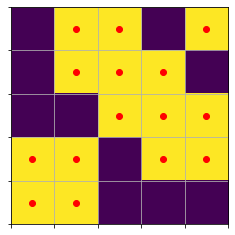

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def visualize(board, n):
    board = np.array(board)
    clicks = np.argwhere(board == 1)
    plt.imshow(board, interpolation='none')
    plt.scatter(clicks[:, 1], clicks[:, 0], c='red')
    plt.gca().set_xticks(np.arange(-0.5, n, 1))
    plt.gca().set_xticklabels([])
    plt.gca().set_yticks(np.arange(-0.5, n, 1))
    plt.gca().set_yticklabels([])
    plt.grid()
    plt.show()
    
visualize(X, n)

## Additional exercise

- Try to experiment with the model for different values of parameter $n$.
- See, how far is the model scalable (i.e., is it able to solve the problem for n ~ 10, n ~ 100, or even more in a reasonable time?).